In [1]:
import numpy as np #used for handling large mathematical dataset.

import pandas as pd #used for data analysis and manipulation provides DataFrames and series.

import re #used for finding text patterns, extract specific text, replace text efficiency.

import nltk #used for text processing, NLP, and AI applications.

import matplotlib.pyplot as plt #uesd for visualization and creating graphs ,plots etc.

import seaborn as sns #used for creating beautiful statistical and high level visualization.

from wordcloud import WordCloud #used to generate word clouds from text data and visualize the frequency of words in a dataset, where larger words appear more frequently.

import plotly.express as px #used for creating innovative plots and it supports scatter plots, maps, histogram, barcharts, etc.
import plotly.graph_objects as go #It is a more customized API.It allows fine-gained control over plots.
from plotly.subplots import make_subplots #It allows to display multiple plots in a single frames.

In [2]:
data = pd.read_csv('Adarsh_twitter.zip')

Data.head describe that the top 5 rows in my table that we initialize here.

In [3]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


Data.tail is used for describing the last 5 rows.

In [4]:
data.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


Data.info is used for describing the all information about the data.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


Data.shape is used to describe the shape of the data. where 31962 is no of rows and 3 is no of columns.

In [6]:
data.shape

(31962, 3)

describe is one of the functions that allows me to shows the values like count, mean, std, min etc.

In [7]:
data.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


Now here i make a function(pattern_remove)
and take two variables (in_text, in_pattern)
now make another variable 'a' and then reuse and call all variables.
Then call characters and the returns.

In [8]:
def pattern_remove(in_text,in_pattern):
  a = re.findall(in_pattern, in_text)
  for characters in a:
    in_text = re.sub(characters, "", in_text)
  return in_text


In [9]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [10]:
data.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


To removing and cleaning the tweets i make a new coloumn and by using vectorize function i just clean all my data.
'vectorize' fubction allows me to remove those things efficienttly.

In [11]:
data['new_tweet'] = np.vectorize(pattern_remove)(data['tweet'], "@[\w]*")

In [12]:
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


Now we actually doing here to removing the special character and unarranged numeric values.

In [13]:
data['new_tweet'] = data['new_tweet'].str.replace("[^a-zA-Z0-9 ]", " " )

In [14]:
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [15]:
data['new_tweet'] = data['new_tweet'].apply(lambda b : " ".join([c for c in b.split() if len(c)>3]))


In [16]:
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: society #motivation


In [17]:
used_words = data['new_tweet'].apply(lambda b : b.split())
used_words.head()

,new_tweet
0,"[when, father, dysfunctional, selfish, drags, ..."
1,"[thanks, #lyft, credit, can't, cause, they, do..."
2,"[bihday, your, majesty]"
3,"[#model, love, take, with, time, urð±!!!, ð..."
4,"[factsguide:, society, #motivation]"


Now here we combine the used words into a sentences by using join function.

In [18]:
for i in range(len(used_words)):
  used_words[i] = ' '.join(used_words[i])

data['new_tweet'] = used_words


In [19]:
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: society #motivation


By using join function here i combine and most repeated words and make the sentence.

In [20]:
freq_words = " ".join([words for words in data['new_tweet']])

Here we visualizing the most frequent words that are used in data.

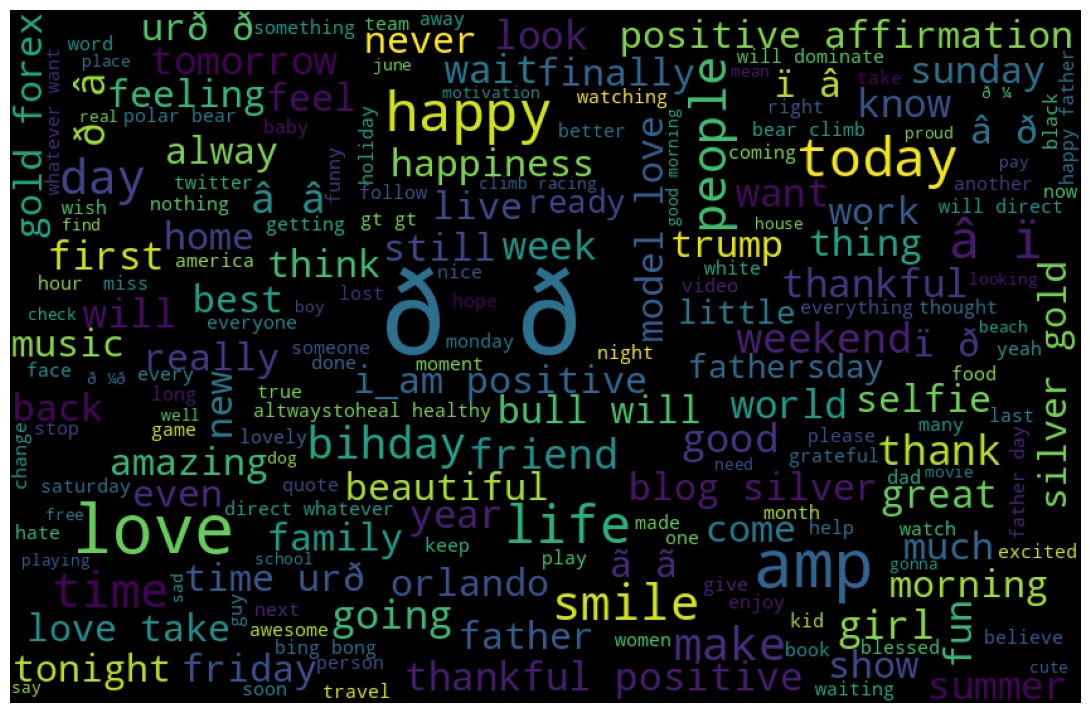

In [21]:
cloud_word = WordCloud(width=850, height=550, random_state=50, max_font_size=90).generate(freq_words)
plt.figure(figsize=(16,9))
plt.imshow(cloud_word)
plt.axis('off')
plt.show()

Now here we visualising the negative tweets only.

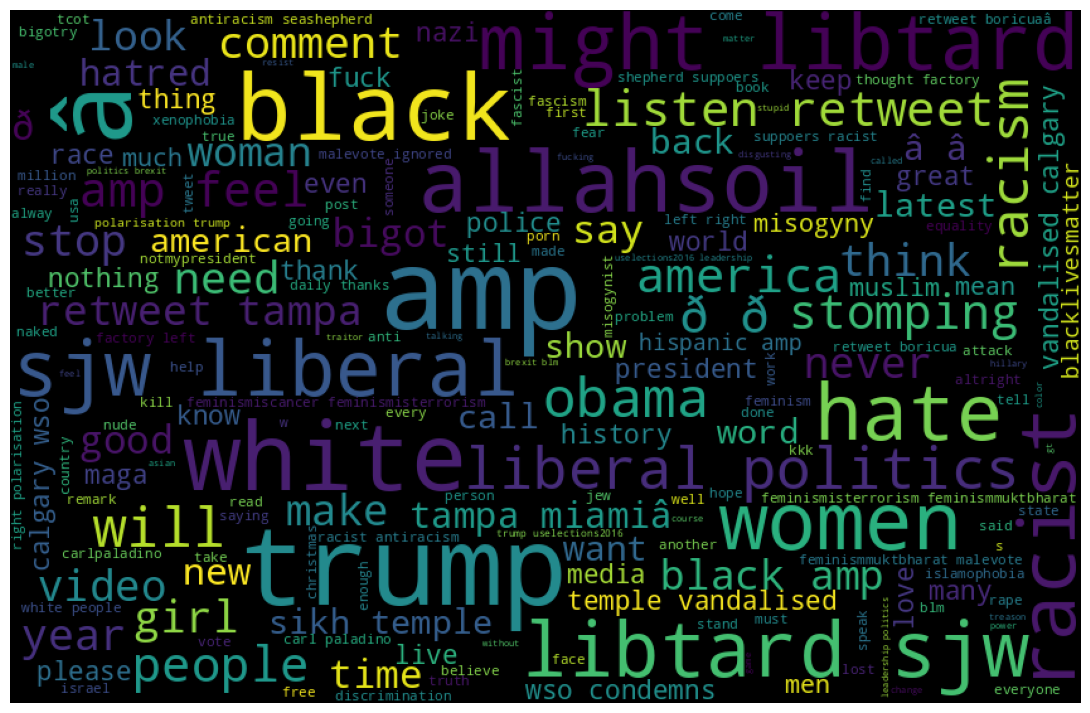

In [22]:
freq_words = " ".join([words for words in data['new_tweet'][data['label']==1]])

cloud_word = WordCloud(width=850, height=550, random_state=50, max_font_size=90).generate(freq_words)
plt.figure(figsize=(16,9))
plt.imshow(cloud_word)
plt.axis('off')
plt.show()

Visualizing for positive tweets only.

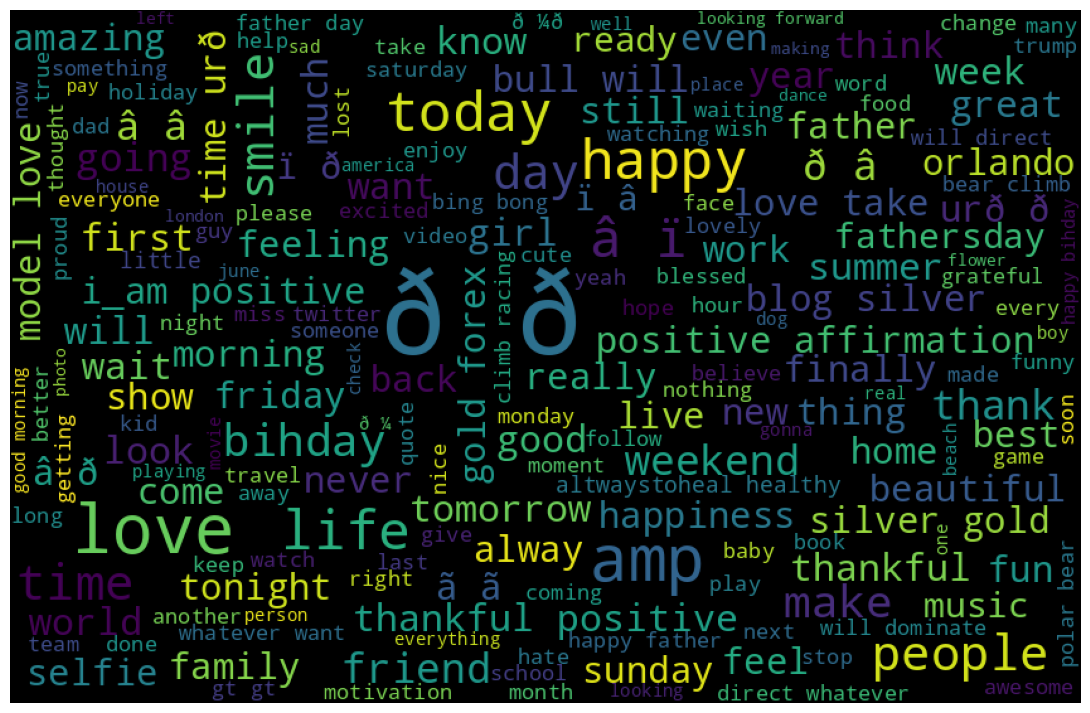

In [23]:
freq_words = " ".join([words for words in data['new_tweet'][data['label']==0]])

cloud_word = WordCloud(width=850, height=550, random_state=50, max_font_size=90).generate(freq_words)
plt.figure(figsize=(16,9))
plt.imshow(cloud_word)
plt.axis('off')
plt.show()

we use to extract the positive and negative tweet by using hashtags.

In [24]:
def get_hashtag(tweets):
  hash_tag = []
  for tweet in tweets:
    hash_tag.append(re.findall(r"#(\w+)", tweet))
  return hash_tag

for negative hashtag we initializing label value is 1
and for positive hashtag we initializing label value as 0.

In [25]:
hashtag_False = get_hashtag(data['new_tweet'][data['label']==1])
hashtag_True = get_hashtag(data['new_tweet'][data['label']==0])

Here extract random 10 negative hashtags.

In [26]:
hashtag_False[:10]


[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphins',
  'thecove',
  'helpcovedolphins'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peace'],
 [],
 ['race', 'identity', 'medâ'],
 ['altright', 'whitesupremacy'],
 ['linguistics', 'race', 'power', 'raciolinguistics']]

Here extract 10 random positive hashtags from tweet.

In [27]:
hashtag_True[:10]

[['run'],
 ['lyft', 'disapointed', 'getthanked'],
 [],
 ['model'],
 ['motivation'],
 ['allshowandnogo'],
 [],
 ['school',
  'exams',
  'hate',
  'imagine',
  'actorslife',
  'revolutionschool',
  'girl'],
 ['allin', 'cavs', 'champions', 'cleveland', 'clevelandcavaliers'],
 ['gr8']]

Flattening a lisi of lists into a single list
Here lists are hashtag_false and hashtag_True
and sum function is used for flattering operations.

In [28]:
hashtag_False = sum(hashtag_False, [])
hashtag_True = sum(hashtag_True, [])

Execute random 10 positive hashtags in a single list.

In [29]:
hashtag_True[:10]

['run',
 'lyft',
 'disapointed',
 'getthanked',
 'model',
 'motivation',
 'allshowandnogo',
 'school',
 'exams',
 'hate']

Execute random 10 negative hashtags in a single list.

In [30]:
hashtag_False[:10]

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphins',
 'thecove',
 'helpcovedolphins',
 'neverump']

Now execute list comprehension used to flatten a list of lists(hashtag_True) into a single list.

In [31]:
hashtag_True = [hashtag for sublist in hashtag_True for hashtag in sublist]

This code is used to count the frequency of hashtags in hashtag_True and store the results in a Pandas DataFrame.

In [32]:
tweet_count = nltk.FreqDist(hashtag_True)
e = pd.DataFrame({'name_hashtag':list(tweet_count.keys()),
                  'total_count' : list(tweet_count.values())})

In [33]:
e.head()

,name_hashtag,total_count
0,r,29143
1,u,16425
2,n,31428
3,l,29739
4,y,14682


selects the top 10 most frequent hashtags based on the total_count column.

In [34]:
e = e.nlargest(columns='total_count', n=10)

Plotly Express (px) to create an interactive bar chart displaying the top 10 most frequent hashtags.

In [35]:
fig = px.bar(e, x='name_hashtag', y='total_count', color ='name_hashtag')
fig.show()

This code is used to count the frequency of hashtags in hashtag_False and store the results in a Pandas DataFrame.

In [36]:
hashtag_False = [hashtag for sublist in hashtag_False for hashtag in sublist]
tweet_count = nltk.FreqDist(hashtag_False)
e = pd.DataFrame({'name_hashtag':list(tweet_count.keys()),
                  'total_count' : list(tweet_count.values())})


In [37]:
e.head()

,name_hashtag,total_count
0,c,1569
1,n,1978
2,m,1779
3,i,3611
4,h,1131


In [38]:
e = e.nlargest(columns='total_count', n=10)

In [39]:
fig = px.bar(e, x='name_hashtag', y='total_count', color ='name_hashtag')
fig.show()